# VOLTMETRO

OBIETTIVO: stimare la resistenza interna del voltmetro

PROCEDIMENTO: usando resistenze dell'ordine dei MΩ misuriamo la corrente di una resistenza equivalente data da $R_{eq} = \frac{R_v R}{Rv + R}$

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'voltmetro.csv'
fr = pd.read_csv(FILE)

R = np.array(fr['R(MOHM)']) * (10**6) #megaOHM # - 0.2 ohm non necessario
sigmaRpercent = 0.01 # 1%
sigmaR = R*sigmaRpercent

I = np.array(fr['uA']) * (10**-6) #microAmpere
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = 5.01 # mantenuta costante
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

In [2]:
def final_val(x,sigma,decimals = 2,exp = 0, udm: str = '') -> str:
    x = np.round(x*np.power(10.0,-exp),decimals)
    sigma = np.round(sigma*np.power(10.0,-exp),decimals)
    return f'{x} ± {sigma} {udm}' if exp == 0 else f'({x} ± {sigma})e{exp} {udm}'

### stima e propagazione dell'errore

In [3]:
Rv = (I/V - 1/R)**-1
sigmaRv = (np.abs(I/V - 1/R)**-1) * np.sqrt((sigmaI/V)**2 + (I*sigmaV/(V**2)**2) + (sigmaR/(R**2))**2)

# print(Rv,sigmaRv)

N = len(Rv)
w = 1/(sigmaRv**2)
avg_Rv = np.average(Rv,weights=w)
# print(np.sqrt(1/np.sum(w)))
sigma_avg_Rv = np.sqrt(1/np.sum(w))
# print(sigma_avg_Rv)

In [4]:
print('Rv: ',final_val(avg_Rv,sigma_avg_Rv,decimals=5,exp=6,udm='Ω'))

Rv:  (10.84591 ± 3e-05)e6 Ω


# CORREZIONE GRAFICO
non serve fare nessun grafico

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'voltmetro.csv'
fr = pd.read_csv(FILE)

R = np.array(fr['R(MOHM)']) * (10**6) #megaOHM # - 0.2 ohm non necessario
sigmaRpercent = 0.01 # 1%
sigmaR = R*sigmaRpercent

I = np.array(fr['uA']) * (10**-6) #microAmpere
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = 5.01 # mantenuta costante
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

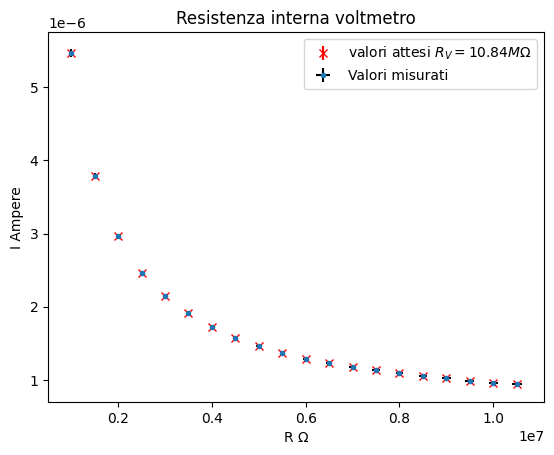

In [13]:
req = 1/(1/Rv + 1/R)
sigmaReq = np.sqrt((sigmaR**2)/(R**4) + (sigmaRv**2)/(Rv**4))
i = V/req
sigmai = np.sqrt((sigmaReq/req)**2)
plt.errorbar(R,i,yerr=sigmai,label='valori attesi $R_V = 10.84M\Omega$',color='red',marker='x',linestyle='None')
plt.errorbar(R,I,xerr=sigmaR,yerr=sigmaI,label='Valori misurati',marker='.',ecolor='black',linestyle='None')
plt.title('Resistenza interna voltmetro')
plt.xlabel('R $\Omega$')
plt.ylabel('I Ampere')
plt.legend()
plt.show()